In [1]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [2]:
# label: true = 0, fake = 1

In [3]:
experiment_name = "mistral_10k"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [4]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [5]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13239
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1654
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1654
    })
})

In [6]:
fake_train_dataset['train'][0]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We\'ve accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN\'s "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla',
 'label': 0}

In [7]:
print(fake_train_dataset['train'][0]['text'])

Former Vice President Dick Cheney on Sunday defended the Bush administration's economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We've accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN's "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla


In [8]:
fake_train_dataset['train'][2]

{'text': 'Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc',
 'label': 0}

In [9]:
print(fake_train_dataset['train'][2]["text"])

Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc


In [10]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,Space shuttle Discovery launched just before m...,1
4,When Eileen Mather lands in Mexico City on her...,0


In [11]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


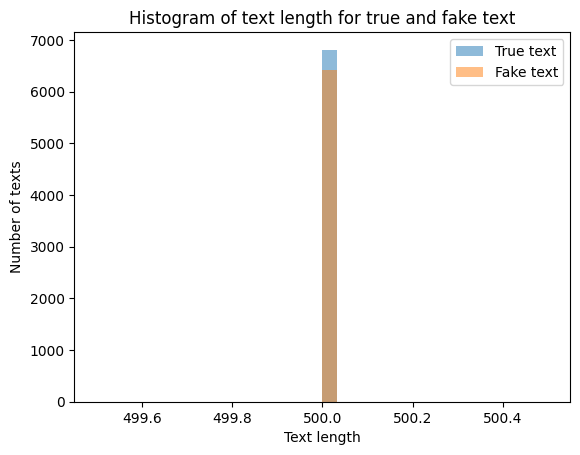

In [12]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [13]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [14]:
fake_train_df.describe()

,label
count,13239.000000
mean,0.485309
std,0.499803
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,6425.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [16]:
fake_train_df.head(20)

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,Space shuttle Discovery launched just before m...,1
4,When Eileen Mather lands in Mexico City on her...,0
5,When Eileen Mather lands in Mexico City on her...,1
6,Zimbabwean lawmakers on Monday narrowly voted ...,0
7,Zimbabwean lawmakers on Monday narrowly voted ...,1
8,Former detainees of Immigration and Customs En...,0
9,Former detainees of Immigration and Customs En...,1


In [17]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


In [18]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


0.0

In [19]:
test_text = "This a test text. It is not very long. It is just a test."

" ".join(test_text.split()[:10])

'This a test text. It is not very long. It'

# Test set

In [20]:
fake_train_dataset["train"][2:6]

{'text': ['Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc',
  'Space shuttle Discovery launched just before midnight Friday on a 13-day mission to the international space station. The launch was delayed from Thursday because of high winds and bad weather. Discovery is carrying a new solar array and a storage unit for the station. The solar array will provide power to the station, which is scheduled to be completed in 2010. The crew will also conduct two spacewalks. One will replace a broken pump that supplies coolant to the station’s ammoni

In [21]:
fake_test_df = pd.read_json("fake_true_dataset_mistral_10k_test.json")
fake_test_df.head()

,text,label
0,[Relatives of the 89 people killed in Sunday's...,0
1,[Relatives of the 89 people killed in Sunday's...,1
2,[The ninth floor of the Miami-Dade pretrial de...,0
3,[The ninth floor of the Miami-Dade pretrial de...,1
4,[A key rebel commander and fugitive from a U.S...,0


In [22]:
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_test_df.head(10)

,text,label
0,"How are the elements of the charming, traditio...",0
1,"How are the elements of the charming, traditio...",1
2,South Carolina authorities have located a 555-...,0
3,South Carolina authorities have located a 555-...,1
4,A man accused of shooting into a crowd outside...,0
5,A man accused of shooting into a crowd outside...,1
6,The son of Gabon's former president was declar...,0
7,The son of Gabon's former president was declar...,1
8,The Scottish woman who became an Internet sing...,0
9,The Scottish woman who became an Internet sing...,1


In [23]:
fake_test_df["text"][2]

'South Carolina authorities have located a 555-pound teenager and his mother, who faces a charge of violating a custody order, police said Thursday. Alexander Deundray Draper, 14, "is possibly at a stage of critical health risk," social services said. Alexander Deundray Draper, 14, of Travelers Rest, South Carolina, and his mother, Jerri Althea Gray, were located at about 4:30 p.m. near a laundromat in Baltimore, Maryland, by the Baltimore County Sheriff\'s Office, said Matt Armstrong, a spokesman'

In [24]:
fake_test_df["text"].unique().shape

(1654,)

In [25]:
#num_rows: 13377
fake_train_df["text"].unique().shape

(13239,)

In [26]:
# number of samples with label 0 and label 1 in the training dataset and the test dataset
print("Number of samples with label 0 in the training dataset:", fake_train_df[fake_train_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the training dataset:", fake_train_df[fake_train_df["label"] == 1].shape[0])
print("Number of samples with label 0 in the test dataset:", fake_test_df[fake_test_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the test dataset:", fake_test_df[fake_test_df["label"] == 1].shape[0])

Number of samples with label 0 in the training dataset: 6814
Number of samples with label 1 in the training dataset: 6425
Number of samples with label 0 in the test dataset: 853
Number of samples with label 1 in the test dataset: 801


In [30]:
# count how many times label = 0 for odd indices and label = 1 for even indices
print("Number of samples with label 0 in the training dataset for odd indices:", fake_test_df[fake_train_df["label"] == 0].iloc[1::2].shape[0])
print("Number of samples with label 1 in the training dataset for even indices:", fake_test_df[fake_train_df["label"] == 1].iloc[::2].shape[0])

Number of samples with label 0 in the training dataset for odd indices: 427
Number of samples with label 1 in the training dataset for even indices: 400


/tmp/ipykernel_1152/4095731797.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of samples with label 0 in the training dataset for odd indices:", fake_test_df[fake_train_df["label"] == 0].iloc[1::2].shape[0])
/tmp/ipykernel_1152/4095731797.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of samples with label 1 in the training dataset for even indices:", fake_test_df[fake_train_df["label"] == 1].iloc[::2].shape[0])
